In [ ]:
%qtconsole

In [1]:
import bnpy
import numpy as np
import os
import copy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

FIG_SIZE = (15, 8)
plt.rcParams['figure.figsize'] = FIG_SIZE

In [3]:
# Set up online streaming context
n = 5000
b = 10
p = int(n/b)
assert (p>0)
synthetic = {'Unnamed: 0': list(range(0,5000)),
        'anomaly': list(range(0,5000))
        }
some_data = pd.DataFrame(synthetic, columns = ['Unnamed: 0', 'anomaly'])
print (some_data.head())

# path = '/home/torenvln/git/bnp-anomaly/data/anomaly0245.csv'
# all_data = pd.read_csv(path) 
# some_data = all_data.head(5000)
# print(all_data.head(5))
init_data = bnpy.data.XData.from_dataframe(some_data)

   Unnamed: 0  anomaly
0           0        0
1           1        1
2           2        2
3           3        3
4           4        4


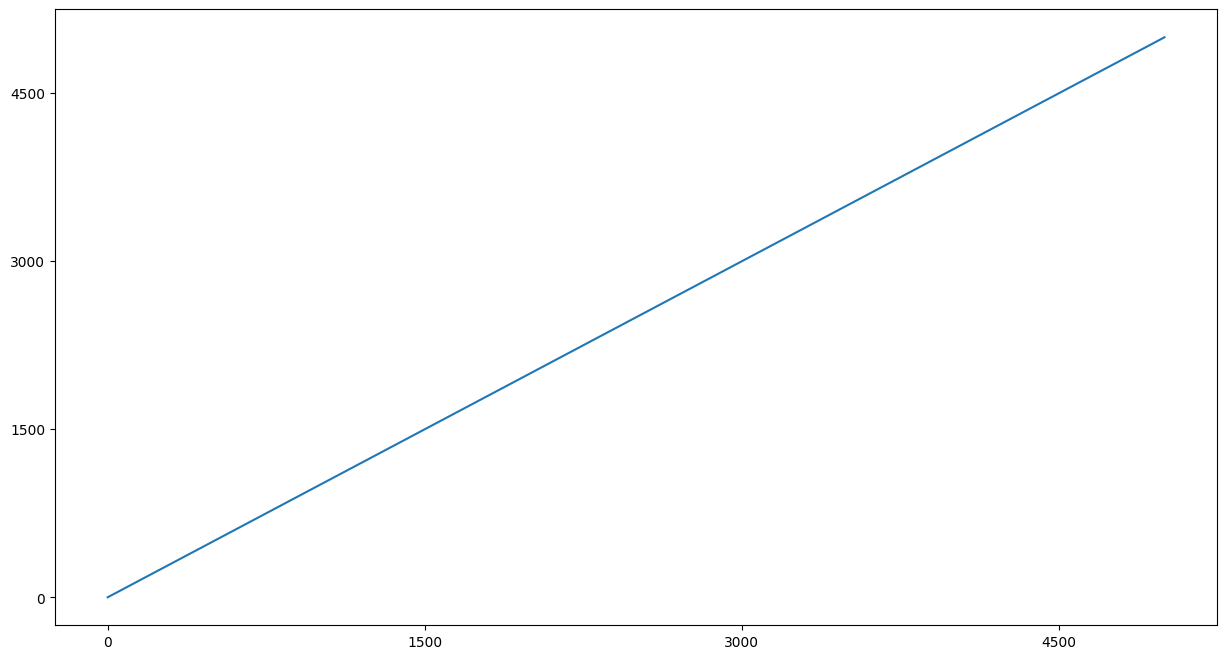

In [4]:
some_data.iloc[:,1].plot()

In [5]:
###############################################################################
#
# Setup: Helper function to display the learned clusters
# ------------------------------------------------------

def show_clusters_over_time(dataset,
        task_output_path=None,
        query_laps=[0, 1, 2, 10, 20, None],
        nrows=2):
    '''
    '''
    ncols = int(np.ceil(len(query_laps) // float(nrows)))
    fig_handle, ax_handle_list = plt.subplots(
        figsize=(FIG_SIZE[0] * ncols, FIG_SIZE[1] * nrows),
        nrows=nrows, ncols=ncols, sharex=True, sharey=True)
    for plot_id, lap_val in enumerate(query_laps):
        print(task_output_path)
        cur_model, lap_val = bnpy.load_model_at_lap(task_output_path, lap_val)
        cur_ax_handle = ax_handle_list.flatten()[plot_id]
        bnpy.viz.PlotComps.plotCompsFromHModel(
            cur_model, dataset=init_data, ax_handle=cur_ax_handle)
        cur_ax_handle.set_title("lap: %d" % lap_val)
        cur_ax_handle.set_xlabel(dataset.column_names[0])
        cur_ax_handle.set_ylabel(dataset.column_names[1])
#        cur_ax_handle.set_xlim(data_ax_h.get_xlim())
#        cur_ax_handle.set_ylim(data_ax_h.get_ylim())
    plt.tight_layout()
    plt.show()

Dataset Summary:
X Data
  total size: 5000 units
  batch size: 10 units
  num. batches: 500
Allocation Model:  DP mixture with K=0. Concentration gamma0= 5.00
Obs. Data  Model:  Gaussian with diagonal covariance.
Obs. Data  Prior:  independent Gauss-Wishart prior on each dimension
  Wishart params 
    nu = 4 
  beta = [ 10  10] 
  Expectations
  E[  mean[k]] = 
  [ 0  0]
  E[ covar[k]] = 
  [[5. 0.]
   [0. 5.]]
Initialization:
  initname = randexamplesbydist
  K = 25 (number of clusters)
  seed = 1607680
  elapsed_time: 0.0 sec
Learn Alg: memoVB | task  1/1 | alg. seed: 1607680 | data order seed: 8541952
task_output_path: /tmp/faithful/trymoves-K=25-gamma=5.0-lik=DiagGauss-ECovMat=5.0*eye-moves=none/1
    0.002/2 after      0 sec. |    150.2 MiB | K   25 | loss  3.928582992e+00 |  
    0.004/2 after      0 sec. |    150.4 MiB | K   25 | loss  4.194406731e+00 |  
    0.006/2 after      0 sec. |    150.4 MiB | K   25 | loss  4.388567564e+00 |  
    1.000/2 after      2 sec. |    151.5 M

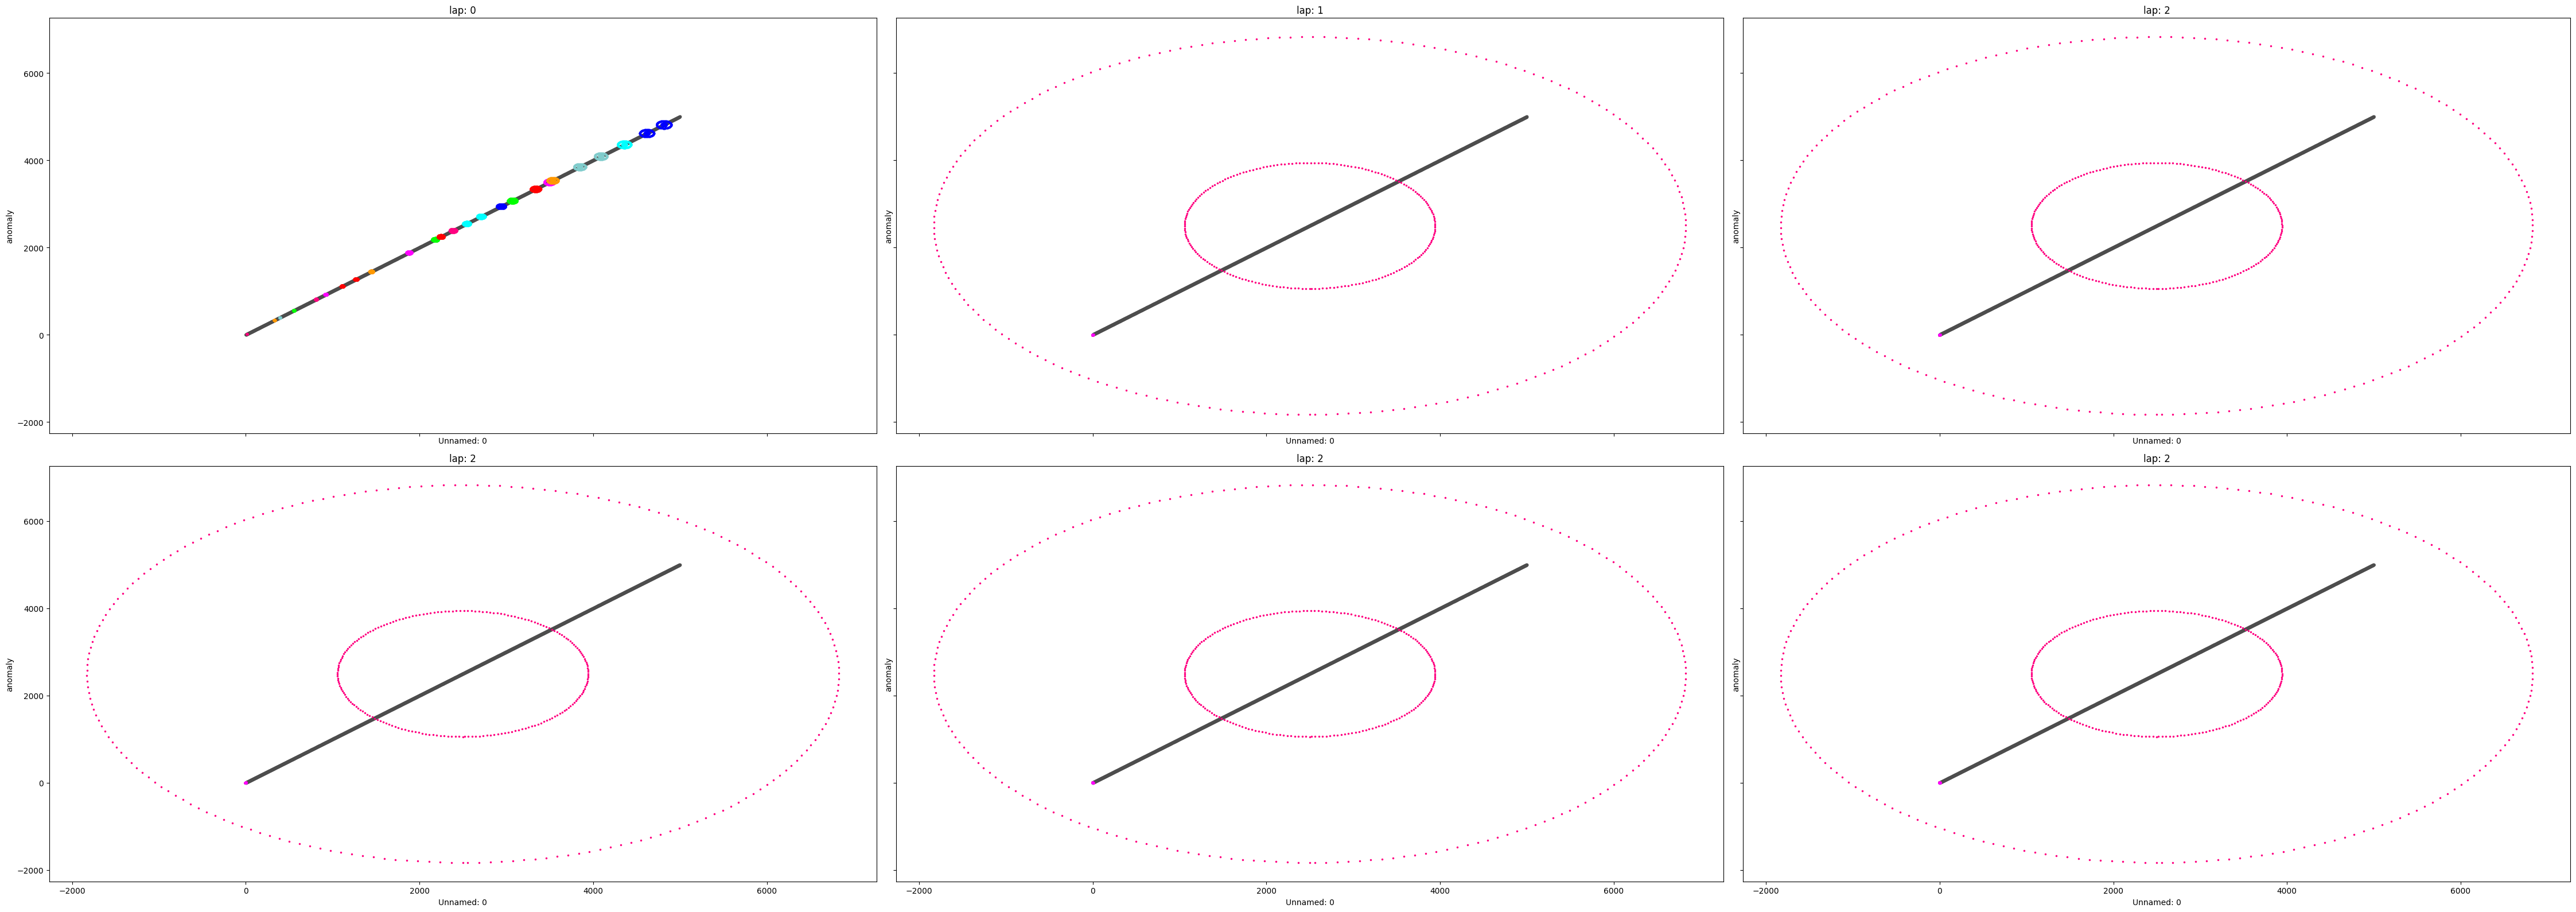

In [6]:
###############################################################################
#
# *DiagGauss* observation model, without moves
# --------------------------------------------
#
# Start with too many clusters (K=25)

gamma = 5.0
sF = 5.0
K = 25

diag1_trained_model, diag1_info_dict = bnpy.run(
    init_data, 'DPMixtureModel', 'DiagGauss', 'memoVB',
    output_path=('/tmp/faithful/' + 
        'trymoves-K=%d-gamma=%s-lik=DiagGauss-ECovMat=%s*eye-moves=none/' % (
            K, gamma, sF)),
    nLap=2, nTask=1, nBatch=p, convergeThr=0.0001,
    gamma0=gamma, sF=sF, ECovMat='eye',
    K=K, initname='randexamplesbydist',
    )
show_clusters_over_time(init_data, diag1_info_dict['task_output_path'])

In [ ]:
# Grab next batch

# Re-index data_set